**Table of contents**<a id='toc0_'></a>    
- 1. [人工神经网络](#toc1_)    
  - 1.1. [最早的神经元算法](#toc1_1_)    
  - 1.2. [感知器算法](#toc1_2_)    
    - 1.2.1. [罗森布拉特感知器规则（Rosenblatt）](#toc1_2_1_)    
    - 1.2.2. [自适应性神经元（Adaline）](#toc1_2_2_)    
    - 1.2.3. [区别](#toc1_2_3_)    
  - 1.3. [scik-learning软件库](#toc1_3_)    
    - 1.3.1. [加载数据集](#toc1_3_1_)    
    - 1.3.2. [训练感知器](#toc1_3_2_)    
      - 1.3.2.1. [拆分训练集和测试集](#toc1_3_2_1_)    
      - 1.3.2.2. [预处理特征值](#toc1_3_2_2_)    
      - 1.3.2.3. [训练模型和预测结果](#toc1_3_2_3_)    
  - 1.4. [逻辑回归分类](#toc1_4_)    
  - 1.5. [支持向量机](#toc1_5_)    
  - 1.6. [核支持向量机求解非线性问题](#toc1_6_)    
  - 1.7. [决策树学习](#toc1_7_)    
  - 1.8. [通过随机森林组合多个决策树](#toc1_8_)    
  - 1.9. [K-近邻——一种懒惰的学习算法](#toc1_9_)    
- 2. [特征工程](#toc2_)    
- 3. [MLP](#toc3_)    
  - 3.1. [手写神经网络](#toc3_1_)    
  - 3.2. [TensorFlow高级API](#toc3_2_)    
- 4. [ML-预处理](#toc4_)    
  - 4.1. [预处理输入](#toc4_1_)    
    - 4.1.1. [识别NaN并处理（删除、填充）](#toc4_1_1_)    
    - 4.1.2. [名词特征和序数特征](#toc4_1_2_)    
      - 4.1.2.1. [名词特征](#toc4_1_2_1_)    
      - 4.1.2.2. [序数特征](#toc4_1_2_2_)    
    - 4.1.3. [拆分训练集和测试集](#toc4_1_3_)    
    - 4.1.4. [把特征保持在统一尺度上](#toc4_1_4_)    
      - 4.1.4.1. [标准化-StandardScaler](#toc4_1_4_1_)    
      - 4.1.4.2. [正则化-Normalizer](#toc4_1_4_2_)    
      - 4.1.4.3. [Min-max 归一化](#toc4_1_4_3_)    
- 5. [防治过拟合](#toc5_)    
  - 5.1. [压缩数据-选取有效特征](#toc5_1_)    
    - 5.1.1. [特征选择](#toc5_1_1_)    
      - 5.1.1.1. [逆顺序选择（SBS）](#toc5_1_1_1_)    
      - 5.1.1.2. [利用随机森林进行特征选择](#toc5_1_1_2_)    
    - 5.1.2. [特征提取](#toc5_1_2_)    
      - 5.1.2.1. [PCA-无监督学习-线性](#toc5_1_2_1_)    
      - 5.1.2.2. [LDA-有监督学习-线性](#toc5_1_2_2_)    
      - 5.1.2.3. [KPCA-核主成分分析-非线性](#toc5_1_2_3_)    
- 6. [管道方法-一步到位（pipeline）](#toc6_)    
- 7. [选择模型](#toc7_)    
  - 7.1. [评估模型](#toc7_1_)    
    - 7.1.1. [使用k折交叉验证评估模型的性能](#toc7_1_1_)    
    - 7.1.2. [学习曲线（learning_curve）](#toc7_1_2_)    
    - 7.1.3. [验证曲线（validation_curve）](#toc7_1_3_)    
    - 7.1.4. [网格搜索为机器学习模型调优](#toc7_1_4_)    
    - 7.1.5. [ROC](#toc7_1_5_)    
  - 7.2. [组合模型](#toc7_2_)    
    - 7.2.1. [多数票原则进行预测](#toc7_2_1_)    
    - 7.2.2. [过自适应增强来利用弱学习者](#toc7_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[人工神经网络](#toc0_)

## 1.1. <a id='toc1_1_'></a>[最早的神经元算法](#toc0_)

最早的神经元模型：麦库洛-皮（MCP）神经元

![Alt text](Pictures/image.png)


## 1.2. <a id='toc1_2_'></a>[感知器算法](#toc0_)

### 1.2.1. <a id='toc1_2_1_'></a>[罗森布拉特感知器规则（Rosenblatt）](#toc0_)

1. 把权重初始化为0或者为小的随机数
2. 对每个训练样本：  
  a. 计算输出值  
  b. 更新权重  

  ![Alt text](Pictures/image-3.png)

In [1]:
import numpy as np


class Perceptron():
    '''Perceptron classifier.
    Parameters
    ------
    eta : float         # 学习效率
    n_iter : int        # 训练次数
    random_state : int  # 随机数的种子
    
    Attributes
    ------
    w_ : 1d-array 一维数组
    errors_ : list 
    '''
    
    def __init__(self, eta=0.01, n_inter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_inter
        self.random_state = random_state

    def fit(self, X, y):
        '''Fit training data.
        Parameters
        ------
        X : 
        y :
        '''
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # 标准差为0.01的正态分布
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                # print(errors)
            self.errors_.append(errors)

    def net_input(self, X):
        '''Calculate net input'''
        return np.dot(X, self.w_[1:] + self.w_[0])

    def predict(self, X):
        '''Return class label after unit step'''
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


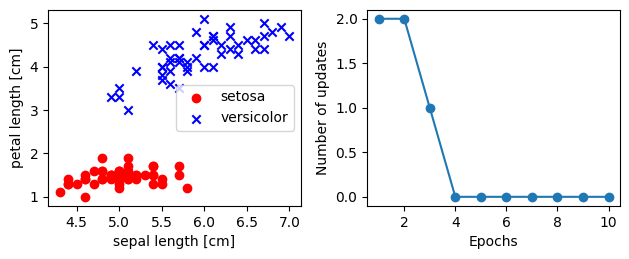

In [3]:
import matplotlib.pyplot as plt
import numpy as np


y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0, 2]].values

plt.figure()
plt.subplot(221)
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend()

plt.subplot(222)
ppn = Perceptron(eta=0.1, n_inter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.tight_layout()

('red', 'blue')


C:\Users\zhao\AppData\Local\Temp\ipykernel_9920\2969081365.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Axes: >

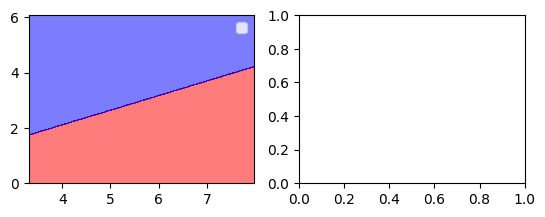

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
resolution = 0.02
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))

Z = ppn.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.figure()
plt.subplot(221)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=ListedColormap(colors[:len(np.unique(y))]))
print(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, cmap=ListedColormap(('red', 'blue')), alpha=0.3)
plt.legend()
plt.subplot(222)
# plt.imshow(xx1, xx2, Z.reshape(xx1.shape))

C:\Users\zhao\AppData\Local\Temp\ipykernel_9920\1046973680.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left')


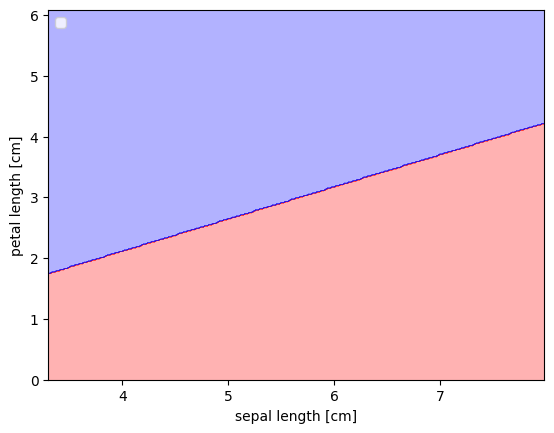

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # for idx, cl in enumerate(np.unique(y)):
    #     plt.scatter(x=X[y == cl, 0], 
    #                 y=X[y == cl, 1],
    #                 alpha=0.8, 
    #                 c=colors[idx],
    #                 marker=markers[idx], 
    #                 label=cl, 
    #                 edgecolor='black')
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

### 1.2.2. <a id='toc1_2_2_'></a>[自适应性神经元（Adaline）](#toc0_)

![Alt text](Pictures/image-5.png)

In [7]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float 学习效率
      Learning rate (between 0.0 and 1.0)
    n_iter : int 迭代次数
      Passes over the training dataset.
    random_state : int 随机数种子
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array 一维数组
      Weights after fitting.
    cost_ : list 增量误差
      Sum-of-squares cost function value in each epoch.

    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features] [样品数目, 特征数目]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples] [特征值]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)                       # 误差值：实际值-计算值
            self.w_[1:] += self.eta * X.T.dot(errors)   # 权重更新：+= eta * 特征的矩阵 * 误差向量 （变导数展开后结果）
            self.w_[0] += self.eta * errors.sum()       # 更新偏置（bias）：+= eta * 误差之和
            cost = (errors**2).sum() / 2.0              # 误差平方和 / 2
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]      # w1*x1 + w2*x2 + ... + wi*xi + 偏置(bias)

    def activation(self, X):
        """Compute linear activation"""
        return X                                        # 激活函数为线性函数

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

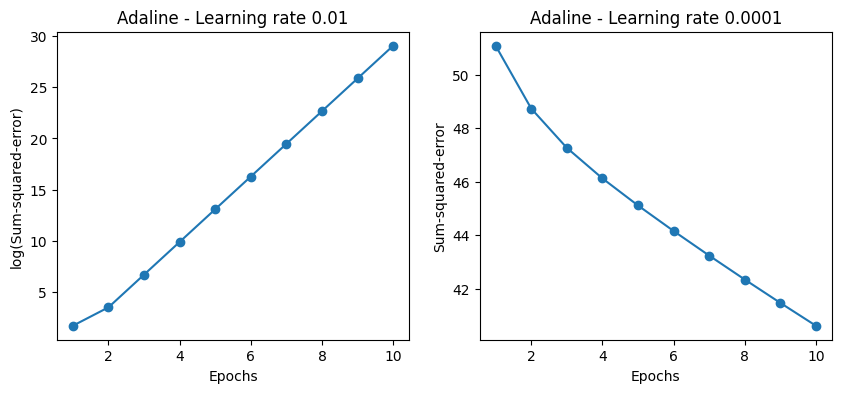

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [10]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


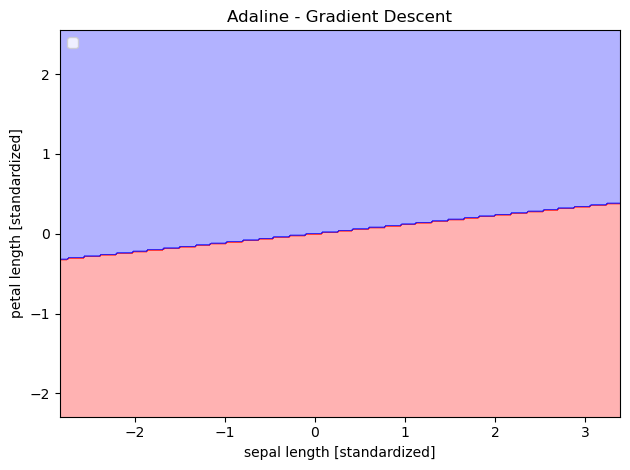

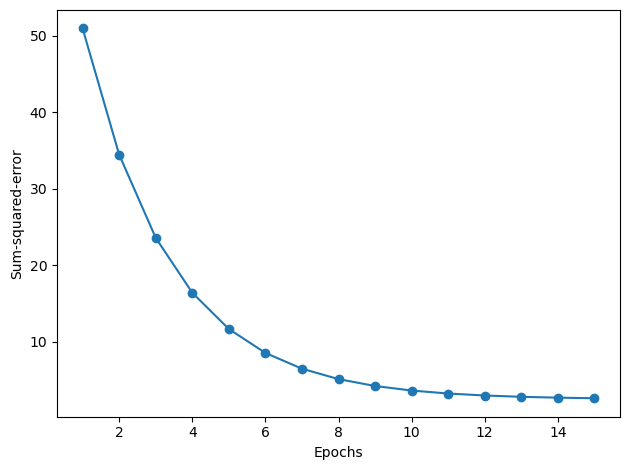

In [11]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
# plt.show()

### 1.2.3. <a id='toc1_2_3_'></a>[区别](#toc0_)

[详见](https://www.jianshu.com/p/3c271d59b14c)

[神经网络](https://zhuanlan.zhihu.com/p/342959259)

## 1.3. <a id='toc1_3_'></a>[scik-learning软件库](#toc0_)

### 1.3.1. <a id='toc1_3_1_'></a>[加载数据集](#toc0_)

In [ ]:
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()

In [13]:
print(iris.data)
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [14]:
print(iris.target)
print(np.unique(iris.target))
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 1 2]
['setosa' 'versicolor' 'virginica']


### 1.3.2. <a id='toc1_3_2_'></a>[训练感知器](#toc0_)

#### 1.3.2.1. <a id='toc1_3_2_1_'></a>[拆分训练集和测试集](#toc0_)

In [15]:
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


#### 1.3.2.2. <a id='toc1_3_2_2_'></a>[预处理特征值](#toc0_)

- 归一化
- 标准化

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
print(X_train_std)
X_test_std = sc.transform(X_test)
print(X_test_std)

[[-0.4301064   2.63118533 -1.33269725 -1.30728421]
 [-0.55053619  0.76918392 -1.16537974 -1.30728421]
 [ 0.65376173  0.30368356  0.84243039  1.44587881]
 [ 1.0150511   0.53643374  1.0655204   1.18367281]
 [-1.03225536  0.30368356 -1.44424226 -1.30728421]
 [ 1.0150511   0.07093339  1.0097479   1.57698181]
 [ 2.09891923 -0.16181679  1.56747294  1.18367281]
 [-0.06881702  2.16568498 -1.44424226 -1.30728421]
 [ 1.61720006 -0.16181679  1.12129291  0.5281578 ]
 [ 0.89462131 -0.39456697  0.45202286  0.1348488 ]
 [-1.03225536 -1.79106803 -0.27301968 -0.2584602 ]
 [-0.79139578 -0.86006732  0.06161534  0.2659518 ]
 [-1.39354474  0.30368356 -1.38846976 -1.30728421]
 [ 0.29247235 -0.62731714  0.50779537  0.0037458 ]
 [-0.4301064  -1.32556767  0.11738784  0.1348488 ]
 [-0.06881702 -0.86006732  0.73088538  0.92146681]
 [-1.27311494  0.76918392 -1.05383474 -1.30728421]
 [-1.03225536 -2.48931856 -0.16147468 -0.2584602 ]
 [-0.06881702 -0.86006732  0.06161534  0.0037458 ]
 [-1.39354474  0.30368356 -1.22

#### 1.3.2.3. <a id='toc1_3_2_3_'></a>[训练模型和预测结果](#toc0_)

In [18]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(n_iter_no_change=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

y_pred = ppn.predict(X_test_std)
print(y_pred)
print(ppn.score(X_test_std, y_pred))

[2 0 0 1 1 1 2 1 2 0 0 2 0 0 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
1.0


## 1.4. <a id='toc1_4_'></a>[逻辑回归分类](#toc0_)

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

print(lr.score(X_test_std, y_pred))

1.0


## 1.5. <a id='toc1_5_'></a>[支持向量机](#toc0_)

## 1.6. <a id='toc1_6_'></a>[核支持向量机求解非线性问题](#toc0_)

## 1.7. <a id='toc1_7_'></a>[决策树学习](#toc0_)

## 1.8. <a id='toc1_8_'></a>[通过随机森林组合多个决策树](#toc0_)

## 1.9. <a id='toc1_9_'></a>[K-近邻——一种懒惰的学习算法](#toc0_)

# 2. <a id='toc2_'></a>[特征工程](#toc0_)

# 3. <a id='toc3_'></a>[MLP](#toc0_)

## 3.1. <a id='toc3_1_'></a>[手写神经网络](#toc0_)

## 3.2. <a id='toc3_2_'></a>[TensorFlow高级API](#toc0_)

In [20]:
import tensorflow as tf 

# 4. <a id='toc4_'></a>[ML-预处理](#toc0_)
## 4.1. <a id='toc4_1_'></a>[预处理输入](#toc0_)
### 4.1.1. <a id='toc4_1_1_'></a>[识别NaN并处理（删除、填充）](#toc0_)

In [21]:
import pandas as pd
pd.__version__

# df.isna()                   # 识别
# df.dropna(axis=1)           # 删除
# df.fillna()                 # 填充

'1.5.3'

In [22]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values="NaN", strategy='mean', axis=0)
imr = imr.fit(df.values) # 从train中训练

X_train_imputed = imr.transform(X_train.values) # 拟合到train
X_test_imputed = imr.transform(X_test) # 拟合到test

TypeError: SimpleImputer.__init__() got an unexpected keyword argument 'axis'

### 4.1.2. <a id='toc4_1_2_'></a>[名词特征和序数特征](#toc0_)

#### 4.1.2.1. <a id='toc4_1_2_1_'></a>[名词特征](#toc0_)
```
衣服的颜色
```

In [23]:
from sklearn.preprocessing import LabelEncoder

# 对名词特征进行编号分类，但是任然会有 序数（大小、顺序等） 对其影响
class_le = LabelEncoder()
y = class_le.fit_transform(df['ClassLabel'].values)

KeyError: 'ClassLabel'

In [24]:
# 独热码，可以去除序数效应
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categories=[0])
ohe.transform()

TypeError: OneHotEncoder.transform() missing 1 required positional argument: 'X'

#### 4.1.2.2. <a id='toc4_1_2_2_'></a>[序数特征](#toc0_)
```
衣服的尺码：S、M、L
```

In [25]:
# 对照表
size_mapping = {'S':0,
                'M':1,
                'L':2}
# 按照对照表进行替换
df['Size'] = df['Size'].apply(lambda x:size_mapping[x])

KeyError: 'Size'

### 4.1.3. <a id='toc4_1_3_'></a>[拆分训练集和测试集](#toc0_)

In [27]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine = df.copy()

In [28]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
# 重命名columns名称
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
# 重新赋值一次才能生效
df_wine_rename = df_wine
df_wine_rename

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [30]:
# df_wine_rename
df_wine_rename['Class label'].unique()

array([1, 2, 3], dtype=int64)

In [31]:
from sklearn.model_selection import train_test_split

X, y = df_wine_rename.iloc[:,1:], df_wine_rename.iloc[:, 0]
X, y

(     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
 0      14.23        1.71  2.43               15.6        127           2.80   
 1      13.20        1.78  2.14               11.2        100           2.65   
 2      13.16        2.36  2.67               18.6        101           2.80   
 3      14.37        1.95  2.50               16.8        113           3.85   
 4      13.24        2.59  2.87               21.0        118           2.80   
 ..       ...         ...   ...                ...        ...            ...   
 173    13.71        5.65  2.45               20.5         95           1.68   
 174    13.40        3.91  2.48               23.0        102           1.80   
 175    13.27        4.28  2.26               20.0        120           1.59   
 176    13.17        2.59  2.37               20.0        120           1.65   
 177    14.13        4.10  2.74               24.5         96           2.05   
 
      Flavanoids  Nonflavanoid phenols

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, # 0.3给test
                                                    random_state=0,
                                                    stratify=y) # ？

### 4.1.4. <a id='toc4_1_4_'></a>[把特征保持在统一尺度上](#toc0_)
```
1. 减少计算量，减少训练时间尽快收敛；
```
#### 4.1.4.1. <a id='toc4_1_4_1_'></a>[标准化-StandardScaler](#toc0_)

In [33]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.fit(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std, X_test_std # 标准正态分布

(StandardScaler(),
 array([[ 8.94437367e-01, -3.88117877e-01,  1.10073064e+00,
         -8.12017114e-01,  1.13201117e+00,  1.09807851e+00,
          7.12041017e-01,  1.81013423e-01,  6.62804643e-02,
          5.12859235e-01,  7.96297849e-01,  4.48295020e-01,
          1.90593792e+00],
        [-1.04879931e+00, -7.72993966e-01,  5.41190056e-01,
         -2.40938809e-01,  3.49414498e-01, -7.07219221e-01,
         -3.08121293e-01,  6.76138376e-01, -1.03520519e+00,
         -9.06567274e-01,  2.24570604e+00, -5.61881713e-01,
         -1.22874035e+00],
        [ 1.64744158e+00, -4.13776283e-01,  2.42768413e-01,
         -1.56343594e+00, -2.19746720e-01,  2.84881333e-01,
          4.47191186e-01, -5.61674005e-01,  5.74658458e-01,
          6.79643589e-02,  2.98063782e-01,  1.38631627e+00,
          1.64471473e+00],
        [ 2.02159300e-01, -4.90751501e-01, -9.13615453e-01,
         -2.58536553e+00,  6.48338887e-02,  5.28840485e-01,
          6.82613258e-01, -8.91757306e-01, -6.11556861e-01,


#### 4.1.4.2. <a id='toc4_1_4_2_'></a>[正则化-Normalizer](#toc0_)

In [34]:
from sklearn.preprocessing import Normalizer

## 等效于
norl = Normalizer()
norl.fit(X_train)
X_train_norl = norl.transform(X_train)
X_test_norl = norl.transform(X_test)
X_train_norl, X_test_norl # [0,1] 范围

(array([[2.43989726e-02, 8.86746801e-03, 4.20980804e-03, ...,
         1.63018099e-03, 3.67238574e-03, 9.85274223e-01],
        [1.10763123e-02, 1.23159578e-03, 2.17340431e-03, ...,
         1.00620570e-03, 2.41489368e-03, 9.94131232e-01],
        [1.06495022e-02, 1.16345618e-03, 2.09422112e-03, ...,
         9.23008567e-04, 2.10197749e-03, 9.96694125e-01],
        ...,
        [3.27814817e-02, 1.19033622e-02, 5.26676544e-03, ...,
         1.36983137e-03, 3.14116504e-03, 9.80137963e-01],
        [1.34066957e-02, 1.22184768e-03, 2.57821071e-03, ...,
         1.10975156e-03, 3.50860848e-03, 9.93171602e-01],
        [2.67550896e-02, 8.15292888e-03, 5.05607992e-03, ...,
         2.50697296e-03, 6.59397090e-03, 9.75402085e-01]]),
 array([[9.97822910e-03, 1.37680721e-03, 1.94202280e-03, 1.23912649e-02,
         8.33330680e-02, 2.17390612e-03, 2.02173269e-03, 2.82607796e-04,
         1.21738743e-03, 4.56520286e-03, 8.18837973e-04, 2.12318165e-03,
         9.96373640e-01],
        [3.28341067e

#### 4.1.4.3. <a id='toc4_1_4_3_'></a>[Min-max 归一化](#toc0_)

In [35]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train_mms = mms.transform(X_train)
X_test_mms = mms.transform(X_test)
X_train_mms, X_test_mms # [0,1] 之间

(array([[0.64619883, 0.83201581, 0.4248366 , ..., 0.45744681, 0.28571429,
         0.19400856],
        [0.6871345 , 0.15612648, 0.65359477, ..., 0.81914894, 0.63369963,
         0.68259629],
        [0.67836257, 0.15019763, 0.65359477, ..., 0.75531915, 0.52747253,
         0.71825963],
        ...,
        [0.72222222, 0.84980237, 0.34640523, ..., 0.10638298, 0.02197802,
         0.09771755],
        [0.16081871, 0.06916996, 0.39215686, ..., 0.54255319, 0.68131868,
         0.43366619],
        [0.37719298, 0.61857708, 0.45751634, ..., 0.75531915, 0.68131868,
         0.13195435]]),
 array([[ 0.69005848,  0.22924901,  0.64052288,  0.30645161,  0.55555556,
          0.69655172,  0.51687764,  0.52      ,  0.39873418,  0.40497336,
          0.69148936,  0.60805861,  0.78245364],
        [ 0.22222222,  0.14031621,  0.54248366,  0.40860215,  0.41975309,
          0.3137931 ,  0.29746835,  0.64      ,  0.19303797,  0.10746004,
          1.03191489,  0.35164835,  0.05492154],
        [ 0.871

# 5. <a id='toc5_'></a>[防治过拟合](#toc0_)
```
1. 搜集更多训练数据（有点难）；
2. 减少数据维度（压缩）；
3. 选择参数少的模型；
4. 通过正则化；
```
## 5.1. <a id='toc5_1_'></a>[压缩数据-选取有效特征](#toc0_)
```
特征选择；
特征提取；
```
### 5.1.1. <a id='toc5_1_1_'></a>[特征选择](#toc0_)
#### 5.1.1.1. <a id='toc5_1_1_1_'></a>[逆顺序选择（SBS）](#toc0_)


#### 5.1.1.2. <a id='toc5_1_1_2_'></a>[利用随机森林进行特征选择](#toc0_)

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


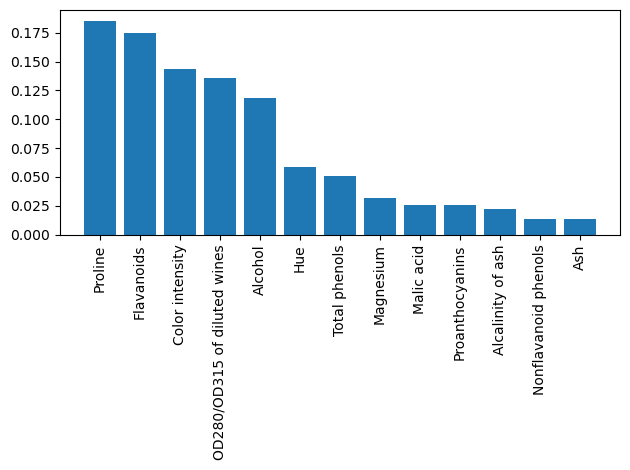

In [36]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importance = forest.feature_importances_
indicaces = np.argsort(importance)[::-1]

feat_labels = df_wine.columns[1:]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indicaces[f]], 
                            importance[indicaces[f]]))

plt.figure()
plt.bar(range(X_train.shape[1]), 
        importance[indicaces],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indicaces], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()

### 5.1.2. <a id='toc5_1_2_'></a>[特征提取](#toc0_)
#### 5.1.2.1. <a id='toc5_1_2_1_'></a>[PCA-无监督学习-线性](#toc0_)

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_mms)
X_test_pca = pca.transform(X_test_mms)
X_train_pca, X_test_pca

(array([[ 0.53348551,  0.12202368],
        [-0.41397259,  0.31349953],
        [-0.55892727,  0.26143099],
        [-0.33221936,  0.12670816],
        [ 0.7388774 ,  0.12756726],
        [ 0.04252518, -0.48859384],
        [ 0.00591599, -0.48097371],
        [ 0.59519107, -0.01077819],
        [ 0.44351196, -0.26729462],
        [ 0.14437863, -0.52505994],
        [ 0.06576165, -0.21433616],
        [-0.67257766,  0.24222752],
        [ 0.56653829, -0.1851105 ],
        [ 0.83236937,  0.18994711],
        [-0.26248487,  0.04865073],
        [ 0.73953667,  0.47557189],
        [-0.24311418, -0.68375172],
        [-0.33810773,  0.07775148],
        [ 0.79291521,  0.45777393],
        [ 0.70978326,  0.14885811],
        [-0.19211891, -0.37655114],
        [-0.41272181,  0.24795796],
        [-0.3454985 , -0.44270321],
        [ 0.21548479, -0.34307179],
        [-0.16599105, -0.42894831],
        [-0.4742517 , -0.24871375],
        [ 0.69708233,  0.36259466],
        [-0.48704415,  0.314

#### 5.1.2.2. <a id='toc5_1_2_2_'></a>[LDA-有监督学习-线性](#toc0_)

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_mms, y_train)
X_train_lda

array([[-2.96463525e+00,  1.15696578e+00],
       [ 3.35009835e+00,  2.07089788e+00],
       [ 3.06163017e+00,  1.09368358e+00],
       [ 2.73298160e+00,  1.49363859e+00],
       [-3.54607454e+00,  9.92205527e-01],
       [ 1.65265822e-02, -2.95671405e+00],
       [-2.65217532e-01, -3.71080577e+00],
       [-3.35455379e+00,  1.41853278e-01],
       [-8.27887672e-01, -1.91824846e+00],
       [-1.47271886e+00, -3.92230732e+00],
       [-5.55260633e-01, -1.77931039e+00],
       [ 4.41646387e+00,  2.29291397e+00],
       [-1.89893873e+00, -7.66042417e-01],
       [-5.49795276e+00,  1.46407663e+00],
       [ 2.00548346e+00,  9.01662907e-01],
       [-4.66436578e+00,  2.64522287e+00],
       [ 1.13237281e-01, -5.06124163e+00],
       [ 3.19851190e+00,  3.82628514e-01],
       [-4.08602659e+00,  3.54626880e+00],
       [-3.44812085e+00,  1.16866440e+00],
       [-6.84407007e-01, -3.69783272e+00],
       [ 3.34974226e+00,  2.11208901e+00],
       [ 1.83687080e+00, -2.28371487e+00],
       [-6.

#### 5.1.2.3. <a id='toc5_1_2_3_'></a>[KPCA-核主成分分析-非线性](#toc0_)

In [39]:
from sklearn.decomposition import KernelPCA as KPCA 

kpca = KPCA(n_components=2, kernel='rbf', gamma=15)
X_train_kpca = kpca.fit_transform(X_train_mms)
X_train_kpca

array([[-0.03976779, -0.09039508],
       [ 0.0161913 , -0.01203324],
       [ 0.18202772,  0.07087485],
       [ 0.31825905,  0.18698265],
       [-0.04762685, -0.10676342],
       [-0.16289496,  0.15654251],
       [-0.15115832,  0.18280474],
       [-0.03879243, -0.07447666],
       [-0.08231583, -0.05914521],
       [-0.11523752,  0.11555614],
       [-0.04476889, -0.00467332],
       [ 0.05860952, -0.02687698],
       [-0.02961278, -0.05129688],
       [-0.04004095, -0.08417581],
       [ 0.2467482 ,  0.16543386],
       [-0.03338781, -0.06310065],
       [-0.06127157,  0.0248831 ],
       [ 0.10470485,  0.042482  ],
       [-0.04557878, -0.10199674],
       [-0.05607778, -0.14601264],
       [-0.02519125, -0.03791515],
       [ 0.14502155,  0.05710359],
       [-0.04090758, -0.03060696],
       [-0.02763406, -0.03832685],
       [-0.08312045,  0.04301036],
       [-0.02632214, -0.03485639],
       [-0.04567559, -0.101567  ],
       [ 0.08552073,  0.02131141],
       [-0.02467968,

# 6. <a id='toc6_'></a>[管道方法-一步到位（pipeline）](#toc0_)

In [40]:
df_test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None)
df_test

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [41]:
from sklearn.preprocessing import LabelEncoder # 独热码

df = df_test.copy()
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [42]:
le.transform(['M', 'B'])

array([1, 0])

In [43]:
from sklearn.model_selection import train_test_split # 划分数据集

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [44]:
# 一步到位（管道）：标准化、PCA降维、线性回归

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.956


# 7. <a id='toc7_'></a>[选择模型](#toc0_)

## 7.1. <a id='toc7_1_'></a>[评估模型](#toc0_)


### 7.1.1. <a id='toc7_1_1_'></a>[使用k折交叉验证评估模型的性能](#toc0_)

In [47]:
# K折法

import numpy as np
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10,
                        random_state=1, 
                        shuffle=True).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [256 153], Acc: 0.913
Fold:  2, Class dist.: [256 153], Acc: 1.000
Fold:  3, Class dist.: [256 153], Acc: 0.957
Fold:  4, Class dist.: [256 153], Acc: 0.978
Fold:  5, Class dist.: [256 153], Acc: 0.891
Fold:  6, Class dist.: [257 153], Acc: 0.933
Fold:  7, Class dist.: [257 153], Acc: 0.933
Fold:  8, Class dist.: [257 153], Acc: 0.978
Fold:  9, Class dist.: [257 153], Acc: 0.978
Fold: 10, Class dist.: [257 153], Acc: 0.911

CV accuracy: 0.947 +/- 0.034


In [52]:
# K折+交叉验证
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1) # 线程数，-1：利用所有线程
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV accuracy: 0.950 +/- 0.014


### 7.1.2. <a id='toc7_1_2_'></a>[学习曲线（learning_curve）](#toc0_)

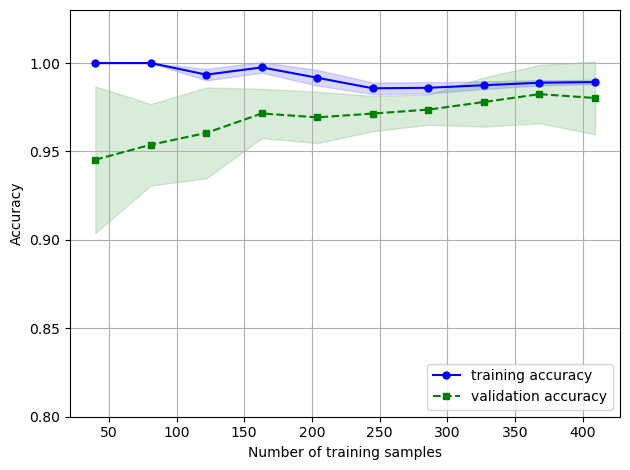

In [54]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# 一步到位：管道
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1))

# 学习曲线，默认利用K折+交叉验证
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()

### 7.1.3. <a id='toc7_1_3_'></a>[验证曲线（validation_curve）](#toc0_)

d:\ProgramFiles\miniconda3\envs\DeepLearning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\ProgramFiles\miniconda3\envs\DeepLearning\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

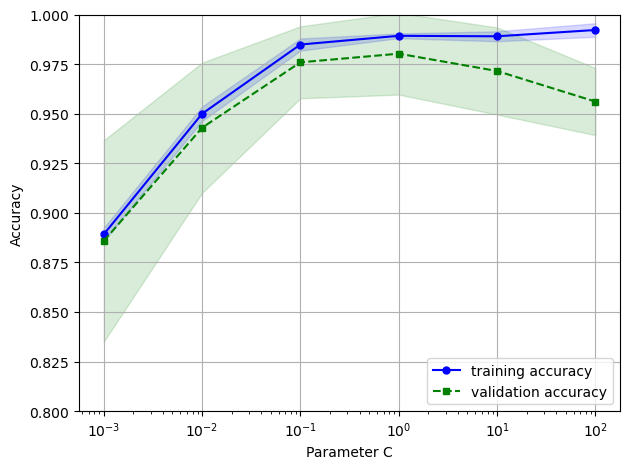

In [57]:
from sklearn.model_selection import validation_curve

# 针对logisticregression__C进行遍历
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

# 验证曲线，默认也是用K折+交叉验证
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()

### 7.1.4. <a id='toc7_1_4_'></a>[网格搜索为机器学习模型调优](#toc0_)

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

# 默认也是进行K折+交叉验证
gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [60]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


### 7.1.5. <a id='toc7_1_5_'></a>[ROC](#toc0_)

In [61]:
from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[71  1]
 [ 2 40]]


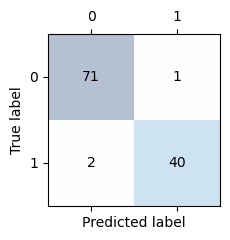

In [62]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()

C:\Users\zhao\AppData\Local\Temp\ipykernel_24824\2343748466.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\zhao\AppData\Local\Temp\ipykernel_24824\2343748466.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)
C:\Users\zhao\AppData\Local\Temp\ipykernel_24824\2343748466.py:30: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(mean_fpr, fpr, tpr)


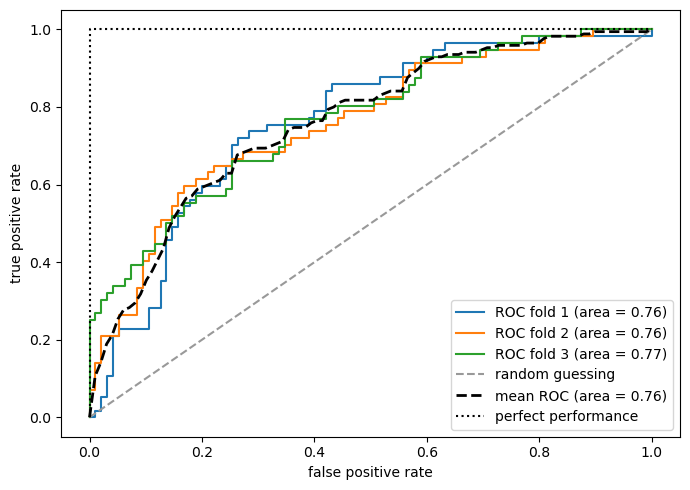

In [65]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1, 
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3, 
                          random_state=1, 
                          shuffle=True).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()

## 7.2. <a id='toc7_2_'></a>[组合模型](#toc0_)

### 7.2.1. <a id='toc7_2_1_'></a>[多数票原则进行预测](#toc0_)

In [66]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test =\
       train_test_split(X, y, 
                        test_size=0.5, 
                        random_state=1,
                        stratify=y)

In [67]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001,
                          random_state=1)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic regression', 'Decision tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


### 7.2.2. <a id='toc7_2_2_'></a>[过自适应增强来利用弱学习者](#toc0_)